<a href="https://colab.research.google.com/github/tuanlamdao/datascience/blob/master/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Classification tasks with iris data set

In [1]:
from sklearn import (datasets as ds, metrics ,
                    model_selection as skms,
                    naive_bayes, neighbors)
import pandas as pd
import seaborn as sns

load iris data, convert to data frame and display 3 head and 3 tail rows

In [3]:
iris = ds.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3),iris_df.tail(3)]))

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[6 rows x 5 columns]

Graph the isris data to have an overview of them

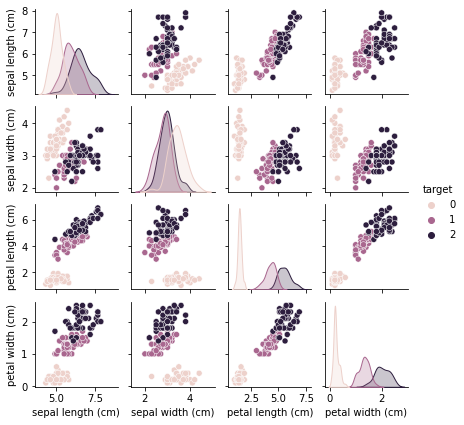

In [4]:
sns.pairplot(iris_df,hue = 'target', height=1.5)

the species of iris data is

In [5]:
print('target: {}'.format(iris.target_names),iris.target_names[0], sep="\n")

target: ['setosa' 'versicolor' 'virginica']
setosa


As target_names[0] is setosa, look at  the chart, Setosa is easy to separate or partition off from the others. versicolor and virginica are more intertwined.
we use unction - train_test_split to split the dataset into training and test sub dataset.   

In [7]:
(iris_train_ftrs, iris_test_ftrs, iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data, iris.target, test_size=.90, random_state = 42)
# we set random_state so the result are reproducible otherwise we get different training and testing sets for each time of running
print('Train feature size: ',iris_train_ftrs.shape)
print('Test feature size: ',iris_test_ftrs.shape)


Train feature size:  (15, 4)
Test feature size:  (135, 4)


we use 2 models: k-NN classification model with k=3 and Naive Bayes for our predictions and then compare its scores

In [8]:
models = {'3NN ': neighbors.KNeighborsClassifier(n_neighbors=3),
          'NB  ': naive_bayes.GaussianNB() }
for name, model in models.items():
    fit = model.fit(iris_train_ftrs, iris_train_tgt)
    preds = fit.predict(iris_test_ftrs)
    score = metrics.accuracy_score(iris_test_tgt, preds)
    print("{:>3s}: {:0.2f}".format(name,score))

3NN : 0.96
NB  : 0.81


with iris dataset, 3NN predict better than NB. 
we can meaure which model run faster than othe by using %timeit 

In [9]:
nb = naive_bayes.GaussianNB()
nb_fit = nb.fit(iris_train_ftrs, iris_train_tgt)
nb_preds = nb_fit.predict(iris_test_ftrs)
metrics.accuracy_score(iris_test_tgt, nb_preds)


0.8074074074074075

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_fit = knn.fit(iris_train_ftrs, iris_train_tgt)
knn_preds = knn_fit.predict(iris_test_ftrs)
metrics.accuracy_score(iris_test_tgt, knn_preds)

0.9629629629629629

we can see NB run 7 times faster than KNN ( k = 3) for initiating model 
           NB run 2 times slower than KNN ( k = 3) for fiting 
           NB run 4 times faster than KNN ( k = 3) for predicting
           NB run a bit faster than KNN ( k = 3) for evaluating

#### Classification tasks with wine data set

In [12]:
wine = ds.load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
display(pd.concat([wine_df.head(3),wine_df.tail(3)]))

alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0      14.23        1.71  2.43  ...                          3.92   1065.0       0
1      13.20        1.78  2.14  ...                          3.40   1050.0       0
2      13.16        2.36  2.67  ...                          3.17   1185.0       0
175    13.27        4.28  2.26  ...                          1.56    835.0       2
176    13.17        2.59  2.37  ...                          1.62    840.0       2
177    14.13        4.10  2.74  ...                          1.60    560.0       2

[6 rows x 14 columns]

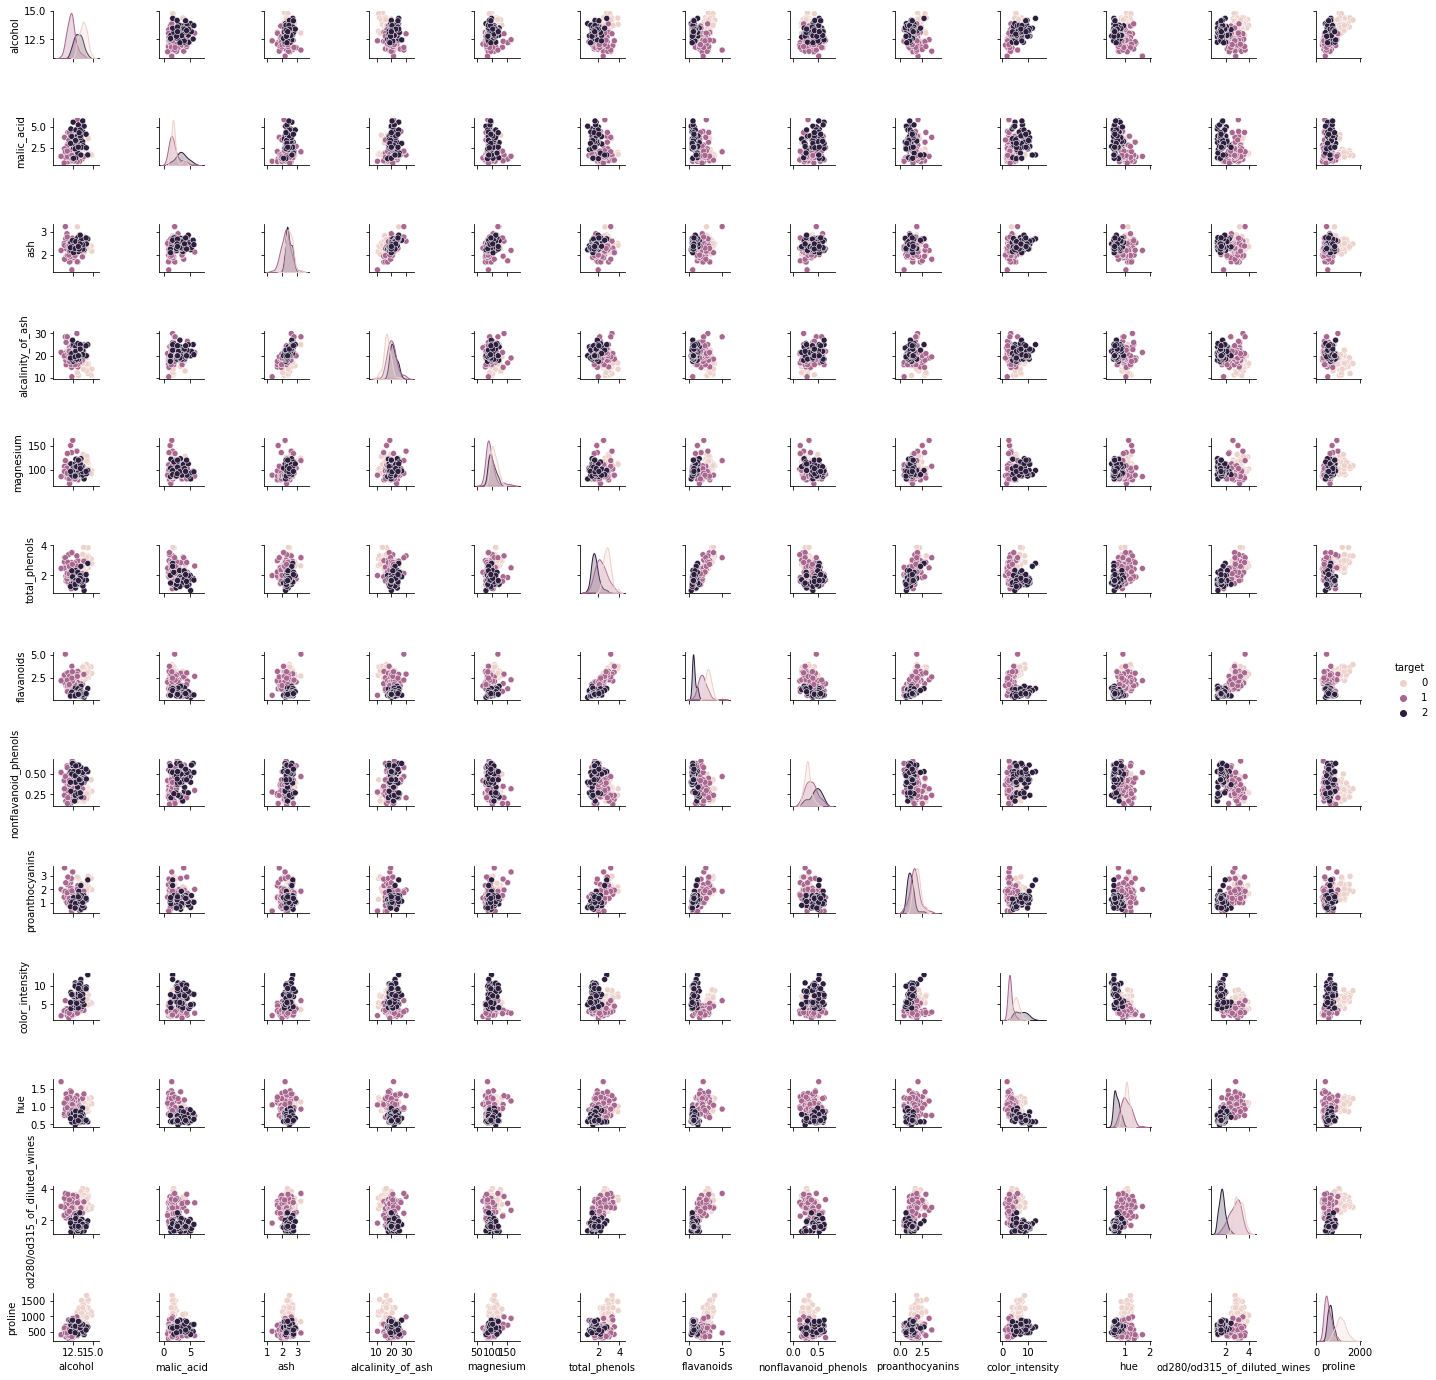

In [13]:
sns.pairplot(wine_df,hue = 'target', height=1.5)

In [14]:
print('target: {}'.format(wine.target_names),wine.target_names[0], sep="\n")

target: ['class_0' 'class_1' 'class_2']
class_0


In [15]:
(wine_train_ftrs, wine_test_ftrs, wine_train_tgt, wine_test_tgt) = skms.train_test_split(wine.data, wine.target, test_size=.90, random_state = 42)
# we set random_state so the result are reproducible otherwise we get different training and testing sets for each time of running
print('Train feature size: ',wine_train_ftrs.shape)
print('Test feature size: ',wine_test_ftrs.shape)

Train feature size:  (17, 13)
Test feature size:  (161, 13)


In [16]:
models = {'3NN ': neighbors.KNeighborsClassifier(n_neighbors=3),
          'NB  ': naive_bayes.GaussianNB() }
for name, model in models.items():
    fit = model.fit(wine_train_ftrs, wine_train_tgt)
    preds = fit.predict(wine_test_ftrs)
    score = metrics.accuracy_score(wine_test_tgt, preds)
    print("{:>3s}: {:0.2f}".format(name,score))

3NN : 0.68
NB  : 0.80


with wine dataset NB predicts better than 3NN

#### Classification tasks with breast cancer data set

In [17]:
breast = ds.load_breast_cancer()
breast_df = pd.DataFrame(breast.data, columns = breast.feature_names)
breast_df['target'] = breast.target
display(pd.concat([breast_df.head(3),breast_df.tail(3)]))

mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039       1

[6 rows x 31 columns]

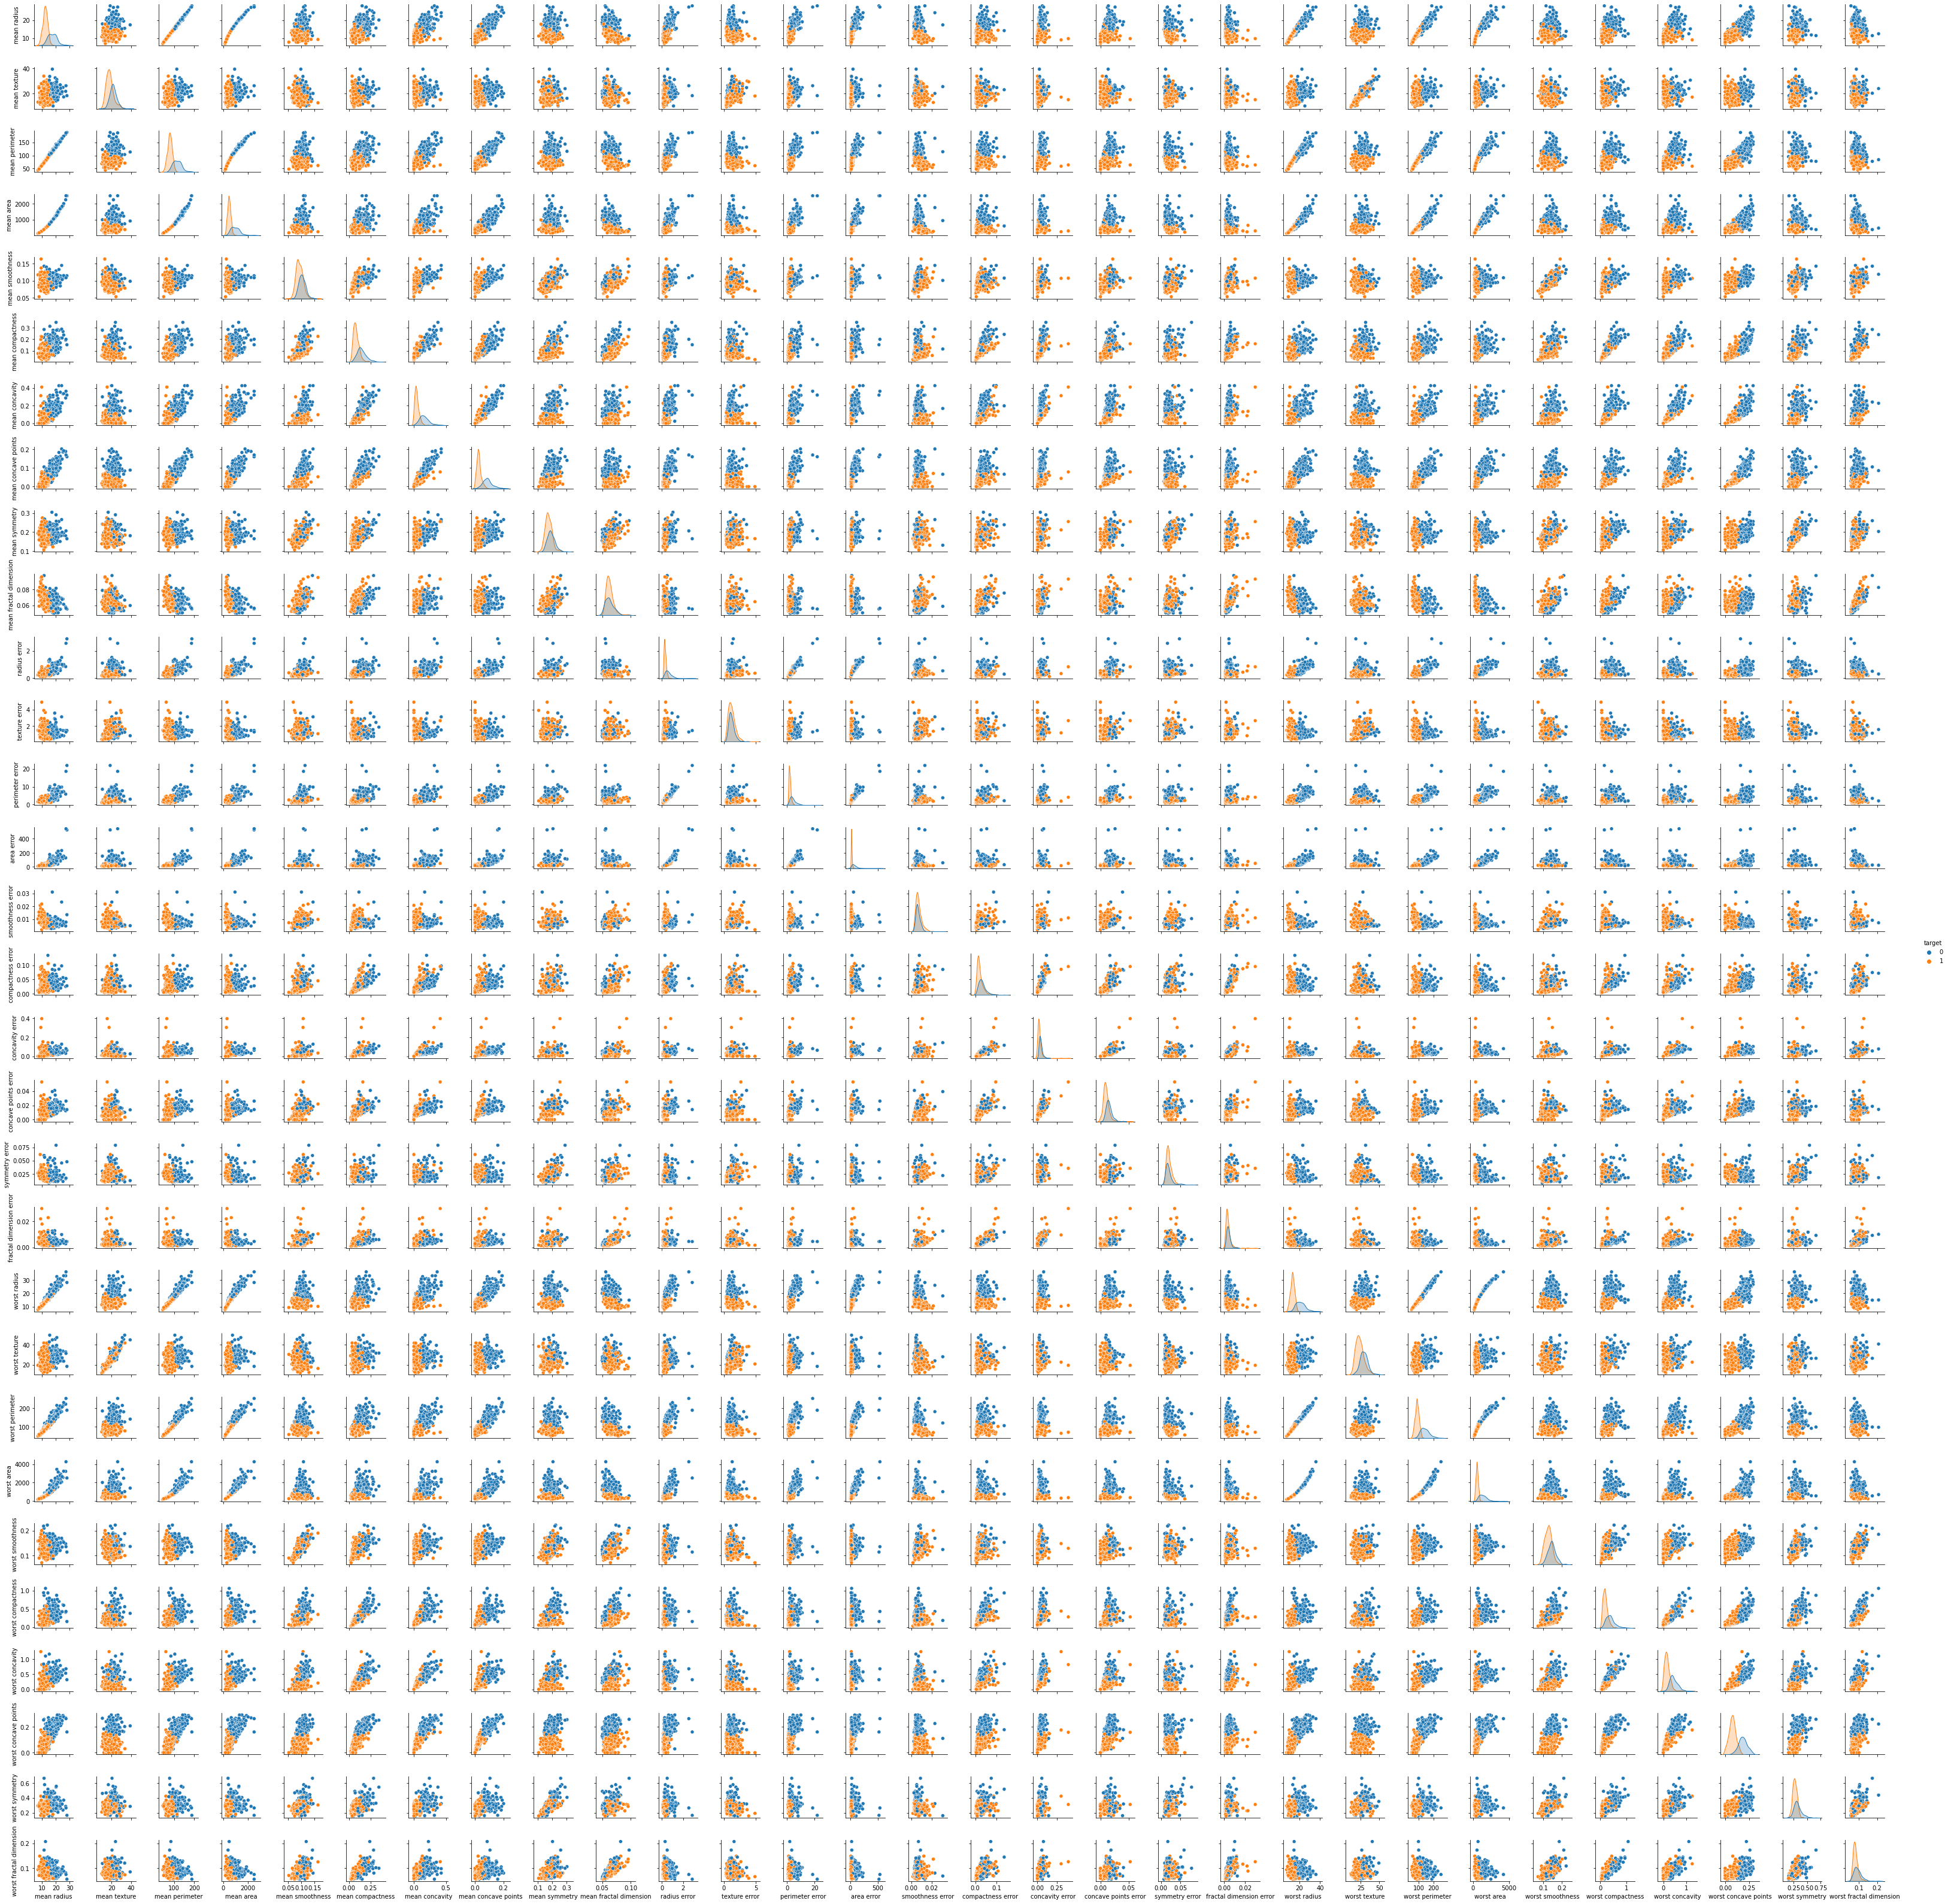

In [18]:
sns.pairplot(breast_df,hue = 'target', height=1.5)

In [19]:
print('target: {}'.format(breast.target_names),breast.target_names[0], sep="\n")

target: ['malignant' 'benign']
malignant


In [20]:
(breast_train_ftrs, breast_test_ftrs, breast_train_tgt, breast_test_tgt) = skms.train_test_split(breast.data, breast.target, test_size=.90, random_state = 42)
# we set random_state so the result are reproducible otherwise we get different training and testing sets for each time of running
print('Train feature size: ',breast_train_ftrs.shape)
print('Test feature size: ',breast_test_ftrs.shape)

Train feature size:  (56, 30)
Test feature size:  (513, 30)


In [21]:
models = {'3NN ': neighbors.KNeighborsClassifier(n_neighbors=3),
          'NB  ': naive_bayes.GaussianNB() }
for name, model in models.items():
    fit = model.fit(breast_train_ftrs, breast_train_tgt)
    preds = fit.predict(breast_test_ftrs)
    score = metrics.accuracy_score(breast_test_tgt, preds)
    print("{:>3s}: {:0.2f}".format(name,score))

3NN : 0.89
NB  : 0.94


with breast cancer dataset NB predicts better than 3NN